<a href="https://colab.research.google.com/github/Kadiyan-harsh/Session-Based-Recommender-System/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/Explo')

In [ ]:
from Modules import Preprocess
original = 'drive/MyDrive/Explo/Data/'
processed = 'drive/MyDrive/Explo/Data/Processed'
Preprocess.cleanData(original, processed)


Test set
	Events: 71222
	Sessions: 15324
	Items: 6751
Train set
	Events: 31579006
	Sessions: 7953885
	Items: 37483
Validation set
	Events: 58233
	Sessions: 12372
	Items: 6359


In [ ]:
import os
import torch
from Modules import Tools, Dataset

dataFolder = 'drive/MyDrive/Explo/Data/Processed/'
trainDataFile = 'rsc15Train.csv'
validDataFile = 'rsc15Valid.csv'

sessionKey = 'SessionId'
itemKey = 'ItemId'
timeKey = 'Time'

trainPath = os.path.join(dataFolder, trainDataFile)
validPath = os.path.join(dataFolder, validDataFile)

trainDataSet = Dataset.Dataset(trainPath, sessionKey=sessionKey, itemKey=itemKey, timeKey=timeKey)
validDataSet = Dataset.Dataset(validPath, sessionKey=sessionKey, itemKey=itemKey, timeKey=timeKey, itemMap=trainDataSet.itemMap)

Loading data from drive/MyDrive/Explo/Data/Processed/rsc15Train.csv
Loading data from drive/MyDrive/Explo/Data/Processed/rsc15Valid.csv


In [ ]:
inputSize = trainDataSet.nItems
outputSize = inputSize
hiddenSize = 100
nLayers = 1
batchSize = 32
negative = True
embeddingDim = -1
dropoutHidden = 0.0
dropoutEmbed = 0.0
sigma = 0.0
initAsNormal = False
cuda = torch.cuda.is_available()

finalAct = 'elu-1'
lossType = 'bprmax'
optimizerType = 'adagrad'
lr = 0.1
weightDecay = 0.0
momentum = 0.0
bpreg = 1.0
nEpochs = 10

timeSort = True
trainRandomOrder=False
sampleAlpha=0.75
trainNSample = 2048
validNSample = 0
sampleStore = 10000000
topN = 20

resultDir = 'drive/MyDrive/Explo/Results'

In [ ]:
!nvidia-smi

Sat Jun  1 19:11:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
finalAct = 'elu-0.5'
lossType = 'bpr-max'
optimizerType = 'adagrad'
hiddenSize = 100
nEpochs = 5
batchSize = 64
dropoutHidden = 0.0
dropoutEmbed = 0.0
lr = 0.2
momentum = 0.3
trainNSample = 2048
sampleAlpha=0.0
bpreg = 0.5
timeSort = True
embeddingDim = 100

Tools.fitAndEvalute(trainDataSet, validDataSet, resultDir, inputSize, outputSize,
                    lossType, finalAct, nLayers,hiddenSize, nEpochs, batchSize, negative,
                    dropoutHidden, dropoutEmbed, lr, momentum,weightDecay,embeddingDim,
                    trainNSample, validNSample, sampleAlpha, optimizerType, bpreg, sigma,
                    initAsNormal,trainRandomOrder, timeSort, topN, sessionKey, itemKey, timeKey, cuda)

Result Folder:drive/MyDrive/Explo/Results/BPR-Max
#### START TRAINING....


Start Epoch # 0


369158it [29:55, 205.55it/s]                            
781it [00:02, 313.18it/s]              


Epoch: 0, train loss: 0.2381, validloss: 0.7481, recall: 0.7137, mrr: 0.3064, time: 1798.5183219909668
Save model as drive/MyDrive/Explo/Results/BPR-Max/model_00000.pt


Start Epoch # 1


369158it [30:19, 202.90it/s]                            
781it [00:02, 353.17it/s]              


Epoch: 1, train loss: 0.2259, validloss: 0.7592, recall: 0.7173, mrr: 0.3116, time: 1821.694696187973
Save model as drive/MyDrive/Explo/Results/BPR-Max/model_00001.pt


Start Epoch # 2


369158it [30:21, 202.68it/s]                            
781it [00:02, 337.74it/s]              


Epoch: 2, train loss: 0.2236, validloss: 0.7607, recall: 0.7181, mrr: 0.3158, time: 1823.699536561966
Save model as drive/MyDrive/Explo/Results/BPR-Max/model_00002.pt


Start Epoch # 3


369158it [30:22, 202.58it/s]                            
781it [00:02, 351.66it/s]              


Epoch: 3, train loss: 0.2225, validloss: 0.7619, recall: 0.7203, mrr: 0.3170, time: 1824.5953123569489
Save model as drive/MyDrive/Explo/Results/BPR-Max/model_00003.pt


Start Epoch # 4


369158it [30:42, 200.32it/s]                            
781it [00:02, 342.31it/s]              


Epoch: 4, train loss: 0.2218, validloss: 0.7636, recall: 0.7200, mrr: 0.3181, time: 1845.1671612262726
Save model as drive/MyDrive/Explo/Results/BPR-Max/model_00004.pt


In [ ]:
from Modules import Evaluation, Dataset, Loss
import torch
import os

dataFolder = 'drive/MyDrive/Explo/Data/Processed/'
trainDataFile = 'rsc15Train.csv'
testDataFile = 'rsc15Test.csv'

sessionKey = 'SessionId';
itemKey = 'ItemId';
timeKey = 'Time';

trainPath = os.path.join(dataFolder, trainDataFile)
testPath = os.path.join(dataFolder, testDataFile)

trainDataSet = Dataset.Dataset(trainPath, sessionKey=sessionKey, itemKey=itemKey, timeKey=timeKey)
testDataSet = Dataset.Dataset(testPath, sessionKey=sessionKey, itemKey=itemKey, timeKey=timeKey, itemMap=trainDataSet.itemMap)

Loading data from drive/MyDrive/Explo/Data/Processed/rsc15Train.csv
Loading data from drive/MyDrive/Explo/Data/Processed/rsc15Test.csv


In [ ]:
testDataGenerator = Dataset.DataGenerator(testDataSet, batchSize=32, nSample=0, sampleAlpha=0.0, timeSort=True, trainRandomOrder=False)

In [ ]:
modelDirectory = os.path.join('drive/MyDrive/Explo/Results', 'BPR-Max')
modelName = 'model_00004.pt'
modelpath = os.path.join(modelDirectory, modelName)

topN = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
r = []
m = []

try:
    checkpoint = torch.load(modelpath)
except:
    checkpoint = torch.load(modelpath, map_location=lambda storage, loc: storage)

model = checkpoint["model"]
model.gru.flatten_parameters()
for i in topN:
  evaluation = Evaluation.Evaluation(model, k=i)
  _, recall, mrr = evaluation.evalute(testDataGenerator)
  r.append(recall)
  m.append(mrr)
print('\n\n')

for i in range(len(topN)):
  print("Test results: recall@{} = {:.4f}, mrr@{} = {:.4f}".format(i+1, r[i], i+1, m[i]))

1765it [00:02, 600.66it/s]                          
1765it [00:02, 609.18it/s]                          
1765it [00:02, 726.09it/s]                          
1765it [00:02, 737.64it/s]                          
1765it [00:02, 746.69it/s]                          
1765it [00:02, 668.16it/s]                          
1765it [00:03, 580.36it/s]                          
1765it [00:02, 751.84it/s]                          
1765it [00:02, 737.75it/s]                          
1765it [00:02, 731.58it/s]                          
1765it [00:02, 732.19it/s]                          
1765it [00:03, 554.97it/s]                          




Test results: recall@1 = 0.4673, mrr@1 = 0.2774
Test results: recall@2 = 0.6035, mrr@2 = 0.2958
Test results: recall@3 = 0.6702, mrr@3 = 0.3011
Test results: recall@4 = 0.7093, mrr@4 = 0.3033
Test results: recall@5 = 0.7373, mrr@5 = 0.3045
Test results: recall@6 = 0.7580, mrr@6 = 0.3052
Test results: recall@7 = 0.7761, mrr@7 = 0.3058
Test results: recall@8 = 0.7911, mrr@8 = 0.3062
Test results: recall@9 = 0.8031, mrr@9 = 0.3065
Test results: recall@10 = 0.8131, mrr@10 = 0.3067
Test results: recall@11 = 0.8220, mrr@11 = 0.3068
Test results: recall@12 = 0.8289, mrr@12 = 0.3070


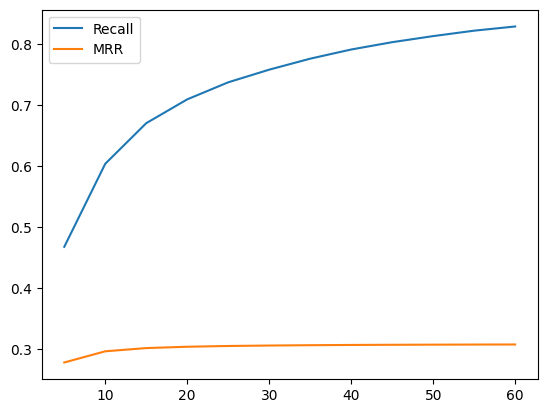

In [ ]:
import matplotlib.pyplot as plt
plt.plot(topN, r, label='Recall')
plt.plot(topN, m, label='MRR')
plt.legend()
plt.show()